# Build a custom component

`jaxspec` enables the build of custom components. This is useful if you want to build a model with a component that is not implemented in `jaxspec`.

## Additive component
In this example, we will first build a component with a known analytical expression. Let's assume we want to model the following function:

$$
\begin{align}
\mathcal{M}_\text{add}( E ) &= K \sin (E/E_0) \exp (-E/E_1)
\end{align}
$$

Using `jaxspec`, this is fairly easy. The only thing required is that every function should be computable using `JAX` primitives. Since `JAX` implements most of the `numpy` functions and a lot of `scipy` functions (see [here](https://jax.readthedocs.io/en/latest/jax.html)), this should not be a problem in the simplest cases.

In [1]:
import jax.numpy as jnp
import haiku as hk
from jaxspec.model.additive import AdditiveComponent


class CustomAdditiveComponent(AdditiveComponent):
    def continuum(self, energy):
        K = hk.get_parameter("K", shape=(), init=jnp.ones)
        E0 = hk.get_parameter("E0", shape=(), init=jnp.ones)
        E1 = hk.get_parameter("E1", shape=(), init=jnp.ones)

        return K * jnp.sin(energy / E0) * jnp.exp(-energy / E1)

To do a quick summary of what is required to build a custom component, we need to:

 1. Inherit from [`AdditiveComponent`][jaxspec.model.additive.AdditiveComponent]
 2. Implement the `continuum` method (optional)
 3. Implement the `emission_lines` method (optional)
 4. Ensure that the parameters to fit are defined using [`hk.get_parameter`][haiku.get_parameter]

And that's all. The newly created component is directly combinable with other components, and can be used to build more complex spectral model.

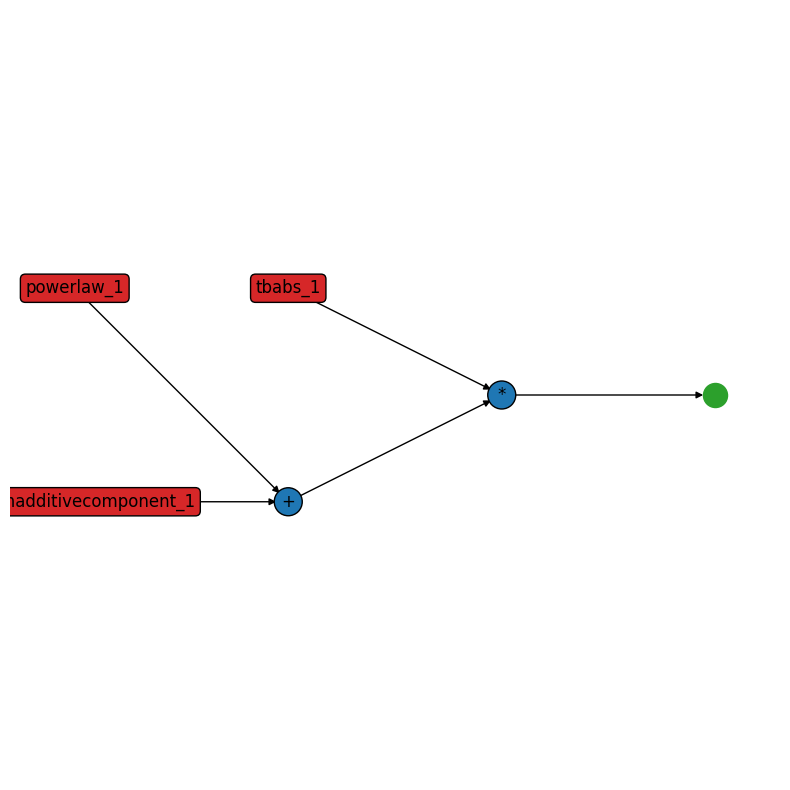

In [2]:
from jaxspec.model.additive import Powerlaw
from jaxspec.model.multiplicative import Tbabs

model = Tbabs() * (Powerlaw() + CustomAdditiveComponent())
model.plot()

Let's understand in depth this code snippet. First, we define a class that inherits from [`AdditiveComponent`](jaxspec.model.additive.AdditiveComponent). This class is an abstract class that defines the interface of an additive component. This interface is composed of two methods: [`continuum`](jaxspec.model.additive.AdditiveComponent.continuum) and [`emission_lines`](jaxspec.model.additive.AdditiveComponent.emission_lines). This functions will be called by the model to compute the continuum and the emission lines of the component.

## Multiplicative component
Let's do the same implementation for a multiplicative component. In this example, we will use the following analytical expression:

$$
\begin{align}
\mathcal{M}_\text{mul}( E ) &= | \cos(E/E_0) |
\end{align}
$$

In [3]:
from jaxspec.model.multiplicative import MultiplicativeComponent


class CustomMultiplicativeComponent(MultiplicativeComponent):
    def continuum(self, energy):
        E0 = hk.get_parameter("E0", shape=(), init=jnp.ones)

        return jnp.abs(jnp.cos(energy / E0))